# Housing Price Prediction

## Library Import

Melakukan import untuk library yang akan digunakan

In [642]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

Menyiapkan dataset yang digunakan ke dalam variabel

In [643]:
df = pd.read_csv('Housing.csv')

In [644]:
df.sample(15)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
354,3780000,8400,2,1,1,yes,no,no,no,no,1,no,furnished
26,8463000,6000,3,2,4,yes,yes,yes,no,yes,0,yes,semi-furnished
222,4760000,9166,2,1,1,yes,no,yes,no,yes,2,no,semi-furnished
466,3010000,3090,3,1,2,no,no,no,no,no,0,no,semi-furnished
126,5880000,7160,3,1,1,yes,no,yes,no,no,2,yes,unfurnished
481,2940000,2700,2,1,1,no,no,no,no,no,0,no,furnished
127,5880000,6500,3,2,3,yes,no,no,no,yes,0,no,unfurnished
394,3500000,3480,3,1,1,no,no,no,no,yes,0,no,unfurnished
533,2100000,2400,3,1,2,yes,no,no,no,no,0,no,unfurnished
493,2800000,3960,3,1,1,yes,no,no,no,no,0,no,furnished


## EDA

Mencari informasi dari dataset yang digunakan

In [645]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [646]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [647]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [648]:
df.duplicated().sum()

0

### Feature Count

Menampilkan jumlah unique value dari masing-masing kolom

In [649]:
bedrooms_count = df['bedrooms'].value_counts()
bedrooms_count

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

In [650]:
count_bathrooms = df['bathrooms'].value_counts()
count_bathrooms

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

In [651]:
stories_count = df['stories'].value_counts()
stories_count

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

In [652]:
count_mainroad=df['mainroad'].value_counts()
count_mainroad

mainroad
yes    468
no      77
Name: count, dtype: int64

In [653]:
guestroom_count = df['guestroom'].value_counts()
guestroom_count

guestroom
no     448
yes     97
Name: count, dtype: int64

In [654]:
furnishingstatus_count = df['furnishingstatus'].value_counts()
furnishingstatus_count

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [655]:
prefarea_count = df['prefarea'].value_counts()
prefarea_count

prefarea
no     417
yes    128
Name: count, dtype: int64

## Data Preprocessing

Menyiapkan feature-feature untuk dimasukkan ke dalam model

melakukan one-hot encoding pada fitur 'furnishingstatus'

In [656]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

konversi fitur biner pada beberapa fitur

In [657]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [658]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [659]:
X = df.drop('price', axis=1)  # Features
y = df['price']               # Target (Price)

In [660]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,7420,4,1,2,1,1,1,0,1,2,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,False,True
541,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,2910,3,1,1,0,0,0,0,0,0,0,False,False


In [661]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

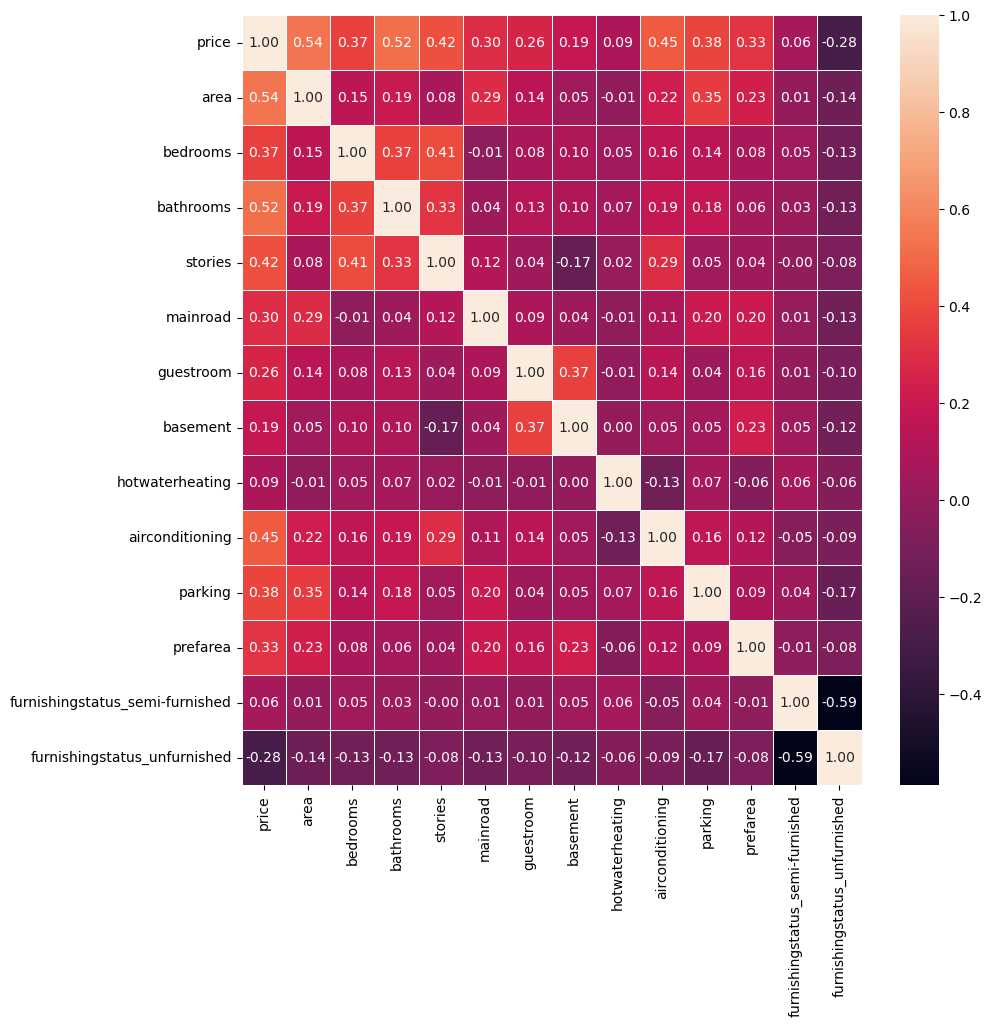

In [662]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.show()

In [663]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [664]:
X

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.80494113,
        -0.84488844, -0.6964292 ],
       [ 1.75700953,  1.40341936,  5.40580863, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  1.80494113,
         1.18358821, -0.6964292 ],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615]])

In [665]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training

Membuat model Random Forest untuk melatih dataset

In [666]:
baseline_model = RandomForestRegressor(n_estimators=100, random_state=42)
baseline_model.fit(X_train, y_train)

/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [667]:
y_pred_rf = baseline_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"MSE: {mse_rf}")
print(f"R²: {r2_rf}")

Random Forest Performance:
MSE: 0.5660015972461019
R²: 0.608958183151397


## Hyperparameter Tuning

Melakukan tuning hyperparameter untuk mencari model terbaik

In [668]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Definisi parameter untuk RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inisiasi Random Forest Regressor
rf = RandomForestRegressor()

# Inisiasi RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,  # Jumlah kombinasi yang akan diuji
    cv=3,       # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1   # Gunakan semua core CPU yang tersedia
)

# Fit RandomizedSearchCV pada data latih
random_search.fit(X_train, y_train)

# Tampilkan hyperparameter terbaik
print("Best Parameters:", random_search.best_params_)

# Model terbaik setelah tuning
best_model = random_search.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features

/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=l

/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_

/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features

/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_

/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=auto

/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_f

model terbaik memiliki parameter yaitu:
- n_estimators: 500
- min_samples_split: 2
- min_samples_leaf: 1
- max_features: log2
- max_depth = 10

## Data Evaluation

Menampilkan kinerja model

In [669]:
y_pred = best_model.predict(X_test)

In [670]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [671]:
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score: {r2}")

Mean Squared Error: 0.5396033339784444
R-Squared Score: 0.6271963380966454


### Perbandingan dengan linear regression

In [672]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Performance:")
print(f"MSE: {mse_lr}")
print(f"R²: {r2_lr}")

# Perbandingan
print("\nModel Comparison:")
print(f"Random Forest - MSE: {mse}, R²: {r2}")
print(f"Linear Regression - MSE: {mse_lr}, R²: {r2_lr}")


Linear Regression Performance:
MSE: 0.5023642289784896
R²: 0.6529242642153177

Model Comparison:
Random Forest - MSE: 0.5396033339784444, R²: 0.6271963380966454
Linear Regression - MSE: 0.5023642289784896, R²: 0.6529242642153177


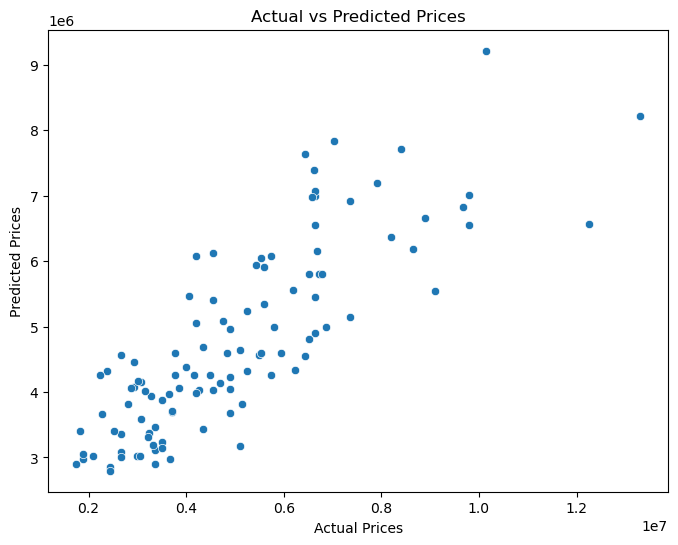

In [673]:
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

### Pembuktian 5 fitur terbaik

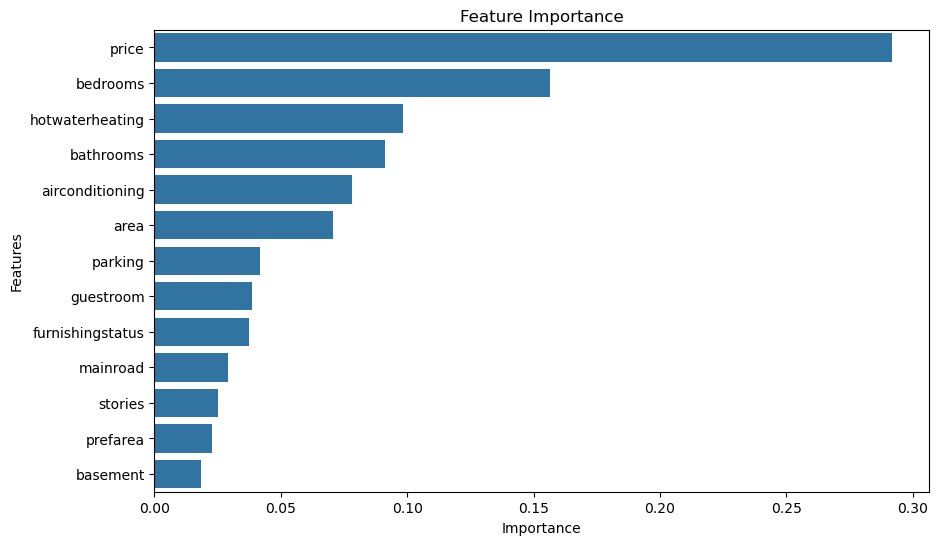

In [674]:
importances = best_model.feature_importances_
features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
            'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 
            'parking', 'prefarea', 'furnishingstatus']

feature_importance_df = pd.DataFrame({'Features': features, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [675]:
X = df[['bedrooms', 'hotwaterheating', 'airconditioning', 'bathrooms', 'area']]   # Features
y = df['price']                                                                 # Target (Price)

In [676]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [677]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [678]:
best_model.fit(X_train, y_train)

/opt/anaconda3/envs/ml-basic/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=500)

In [679]:
y_pred = best_model.predict(X_test)

mse_bm = mean_squared_error(y_test, y_pred)
r2_bm = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_bm}")
print(f"R-Squared Score: {r2_bm}")

Mean Squared Error: 0.6572482125228639
R-Squared Score: 0.5459172970607593
